In [1]:
library(SingleCellExperiment)
library(ggplot2)

Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which

In [2]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/in_vivo_comparison/"

In [3]:
neuroseq_filename = paste0(mydir,"neuroseq_all_25pct_sce.Rds")
neuroseq = readRDS(neuroseq_filename)

In [4]:
neuroseq

class: SingleCellExperiment 
dim: 32738 205416 
metadata(0):
assays(1): counts
rownames(32738): MIR1302-10 FAM138A ... AC002321.2 AC002321.1
rowData names(0):
colnames(205416): TTCCCAGGTTCCATGA-1-0 AACCGCGAGGTCATCT-1-0 ...
  GCGCAGTAGGAATGGA-1-150 GTCCTCATCTAACTTC-1-150
colData names(23): index batch ... umap1 umap2
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [5]:
neuroseq = neuroseq[,neuroseq$celltype %in% c('DA','Sert','CHem')]

In [6]:
neuroseq <- scater::logNormCounts(neuroseq, log=T)
design <- model.matrix(~pool_id, data = colData(neuroseq))
alt.fit <- scran::trendVar(neuroseq, design = design, use.spikes = FALSE)
alt.decomp <- scran::decomposeVar(neuroseq, alt.fit)

Warning message:
“'trendVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'decomposeVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'testVar' is deprecated.
See help("Deprecated")”

In [7]:
# genes_neuroseq = rownames(neuroseq)
genes_neuroseq = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),][1:2000,])

In [8]:
SN_filename = paste0(mydir,"snigra_sce.RDS")
SN = readRDS(SN_filename)

In [9]:
SN = SN[,grep("NEURO",SN$clusters)]
SN

class: SingleCellExperiment 
dim: 29445 2028 
metadata(0):
assays(1): counts
rownames(29445): A1BG A1BG-AS1 ... bP-2171C21.3 bP-2189O9.3
rowData names(0):
colnames(2028): Miami6060a_CAGTCCTAGCGCTTAT-1
  Miami6060a_GCACTCTCATGTAAGA-1 ... MD5862c_CCATGTCGTTCGGCAC-1
  MD5862c_CACACAACATACGCCG-1
colData names(6): nUMI nGene ... tsne1 tsne2
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [10]:
### select genes

In [11]:
### get top 500 HVGs from SN dataset and then intersect

In [12]:
SN <- scater::logNormCounts(SN, log=T)
design <- model.matrix(~dataset, data = colData(SN))
alt.fit2 <- scran::trendVar(SN, design = design, use.spikes = FALSE)
alt.decomp2 <- scran::decomposeVar(SN, alt.fit2)

Warning message:
“'trendVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'decomposeVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'testVar' is deprecated.
See help("Deprecated")”

In [13]:
# genes_SN = rownames(SN)
genes_SN = rownames(alt.decomp2[order(alt.decomp2$bio, decreasing = TRUE),][1:2000,])

In [14]:
all_genes = unique(c(genes_SN,genes_neuroseq))

In [15]:
length(all_genes)

[1] 3454

In [16]:
genes_n = rownames(neuroseq)[rownames(neuroseq) %in% all_genes]
common_genes = rownames(SN)[rownames(SN) %in% genes_n]

In [17]:
length(common_genes)

[1] 3309

In [18]:
query = neuroseq[common_genes,]
reference = SN[common_genes,]

In [19]:
query

class: SingleCellExperiment 
dim: 3309 77195 
metadata(0):
assays(2): counts logcounts
rownames(3309): AAK1 AAMDC ... ZSCAN18 ZSWIM6
rowData names(0):
colnames(77195): TAGAGCTAGCGTAATA-1-6 CATGACAGTGTGCCTG-1-6 ...
  GCGCAGTAGGAATGGA-1-150 GTCCTCATCTAACTTC-1-150
colData names(23): index batch ... umap1 umap2
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [20]:
reference

class: SingleCellExperiment 
dim: 3309 2028 
metadata(0):
assays(2): counts logcounts
rownames(3309): AAK1 AAMDC ... ZSCAN18 ZSWIM6
rowData names(0):
colnames(2028): Miami6060a_CAGTCCTAGCGCTTAT-1
  Miami6060a_GCACTCTCATGTAAGA-1 ... MD5862c_CCATGTCGTTCGGCAC-1
  MD5862c_CACACAACATACGCCG-1
colData names(6): nUMI nGene ... tsne1 tsne2
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [21]:
names(colData(query))
names(colData(reference))

[1] "index"                       "batch"                      
 [3] "donor_id"                    "log1p_n_genes_by_counts"    
 [5] "log1p_total_counts"          "log1p_total_counts_mito"    
 [7] "n_genes_by_counts"           "pct_counts_in_top_100_genes"
 [9] "pct_counts_in_top_200_genes" "pct_counts_in_top_500_genes"
[11] "pct_counts_in_top_50_genes"  "pct_counts_mito"            
[13] "sample_id"                   "total_counts"               
[15] "total_counts_mito"           "cluster_id"                 
[17] "time_point"                  "pool_id"                    
[19] "treatment"                   "n_counts_all"               
[21] "celltype"                    "umap1"                      
[23] "umap2"

[1] "nUMI"     "nGene"    "dataset"  "clusters" "tsne1"    "tsne2"

In [22]:
## function from Shila

In [23]:
query$batch_factor = "query"
reference$batch_factor = "reference"

In [24]:
getJointPCA = function(reference, query, 
                       assayNameRef = "logcounts",
                       assayNameQuery = "logcounts") {
# reference and query are SingleCellExperiment objects
  all_assay = cbind(assay(query, assayNameQuery),
                    assay(reference, assayNameRef))
# batch factors can be dataset specific batches or just a factor labelling i.e. "query", "reference" 
#   batchFactor = factor(c(as.character(query$sample_id),
#                            as.character(reference$dataset)))
 batchFactor = factor(c(as.character(query$batch_factor),
                           as.character(reference$batch_factor)))
#   print(table(batchFactor))
  mbpca = batchelor::multiBatchPCA(all_assay,
                        batch = batchFactor,
                        d = 50
                        # BPPARAM = BiocParallel::MulticoreParam(workers = 4)
  )
  print("done multibatch PCA")
  dim(mbpca[[1]])
  out = do.call(batchelor::reducedMNN, mbpca)
  print("done batch correction")
  joint_mnn_pca = out$corrected
  return(joint_mnn_pca)
}

In [25]:
joint_mnn_pca = getJointPCA(reference, query)

Warning message in sweep(centered, 2, w, "/", check.margin = FALSE):
“'check.margin' is ignored when 'x' is a DelayedArray object or
  derivative”

[1] "done multibatch PCA"
[1] "done batch correction"


In [26]:
df_pca = as.data.frame(joint_mnn_pca[,c(1:2)])
colnames(df_pca) = paste0("PC",1:2)
head(df_pca)

,PC1,PC2
TAGAGCTAGCGTAATA-1-6,19.99969,-3.400372
CATGACAGTGTGCCTG-1-6,17.14397,11.879456
ACAGCCGGTATATCCG-1-6,14.55017,1.092588
GGGCACTCAAAGCGGT-1-6,17.75347,-4.309971
GATGCTATCCTTCAAT-1-6,18.40282,18.507986
TTGGCAATCAGCATGT-1-6,19.24256,3.415190


In [27]:
mat = matrix(0, nrow = length(unique(query$celltype)), ncol = length(unique(reference$clusters)))
nrow(mat)
ncol(mat)

[1] 3

[1] 7

In [28]:
rownames(mat) = unique(query$celltype)
colnames(mat) = unique(reference$clusters)

In [29]:
i = 0
for (celltype in unique(query$celltype)){
#     print(celltype)
    j = 0
    i = i+1
    sel_cells = colnames(query[,query$celltype == celltype])
    closest_atlas_cell_ind = BiocNeighbors::queryKNN(
        joint_mnn_pca[colnames(reference),],
        joint_mnn_pca[sel_cells,],
        k = 2, get.index = TRUE, get.distance = FALSE)
    mapped_cells = colnames(reference)[closest_atlas_cell_ind$index]
    for (cluster in unique(reference$clusters)){
#         print(cluster)
        j = j+1
        n = length(mapped_cells[mapped_cells %in% colnames(reference[,reference$clusters == cluster])])
        mat[i,j] = n/length(mapped_cells)
#         print(mat[i,j])
    }
}

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

In [30]:
mat

,NEUROinh4,NEUROinh2,NEUROinh3,NEUROdop,NEUROinh5,NEUROinh1,NEUROex1
Sert,0.002117149,0.0002714293,0.0005428587,0.6711905,0.0006514304,0.32521307,1.357147e-05
DA,0.005587061,0.0000000000,0.0034227039,0.8890809,0.0004362270,0.10133888,1.342237e-04
CHem,0.001468916,0.0000000000,0.0002369219,0.9115807,0.0001895375,0.08652388,0.000000e+00


In [31]:
library(reshape2)
mat_melt = melt(mat)
head(mat_melt)

Var1,Var2,value
Sert,NEUROinh4,0.0021171489
DA,NEUROinh4,0.0055870608
CHem,NEUROinh4,0.0014689158
Sert,NEUROinh2,0.0002714293
DA,NEUROinh2,0.0000000000
CHem,NEUROinh2,0.0000000000


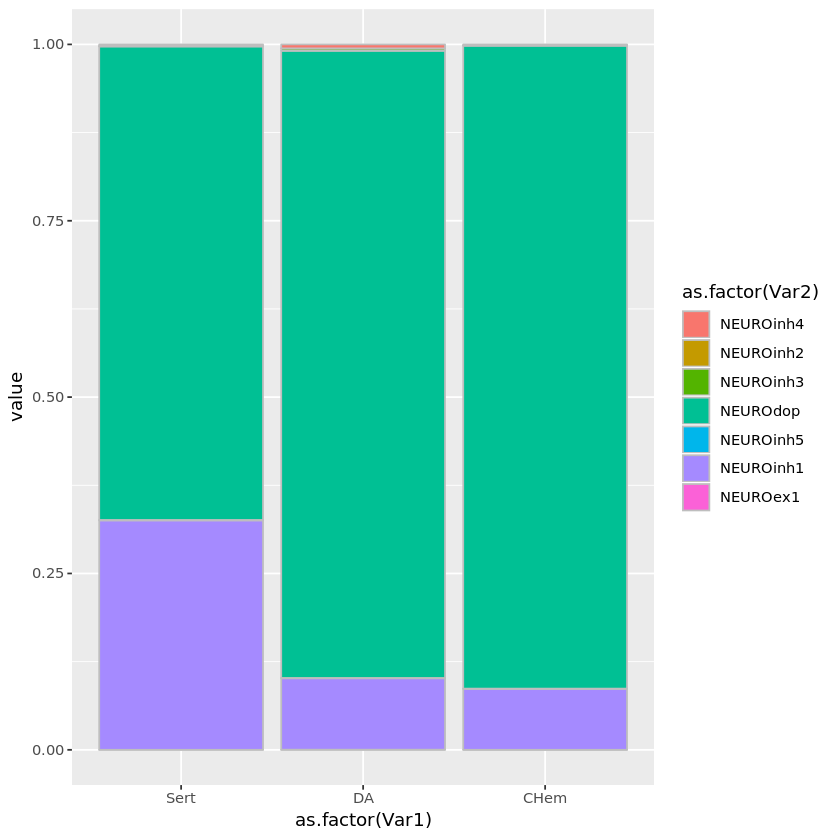

In [32]:
df = as.data.frame(mat_melt)
ggplot(df, aes(x = as.factor(Var1), y = value, fill = as.factor(Var2))) + geom_bar(stat="identity", col = "grey")

In [33]:
df_pca = as.data.frame(joint_mnn_pca[,c(1:2)])
colnames(df_pca) = paste0("PC",1:2)
head(df_pca)

,PC1,PC2
TAGAGCTAGCGTAATA-1-6,19.99969,-3.400372
CATGACAGTGTGCCTG-1-6,17.14397,11.879456
ACAGCCGGTATATCCG-1-6,14.55017,1.092588
GGGCACTCAAAGCGGT-1-6,17.75347,-4.309971
GATGCTATCCTTCAAT-1-6,18.40282,18.507986
TTGGCAATCAGCATGT-1-6,19.24256,3.415190


In [34]:
df_pca$celltype = "DA"
for (celltype in unique(query$celltype)){
    if (celltype != "DA"){
        df_pca[rownames(df_pca) %in% colnames(query[,query$celltype == celltype]),]$celltype = celltype
    }
}

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

In [35]:
# df_pca[rownames(df_pca) %in% colnames(query[,query$celltype == 'Astro' & query$time_point=='D30']),]$celltype = "FPP"

In [36]:
unique(df_pca$celltype)
head(df_pca,2)

[1] "Sert" "DA"   "CHem"

,PC1,PC2,celltype
TAGAGCTAGCGTAATA-1-6,19.99969,-3.400372,Sert
CATGACAGTGTGCCTG-1-6,17.14397,11.879456,DA


In [37]:
for (celltype in unique(reference$clusters)){
#     print(celltype)
    df_pca[rownames(df_pca) %in% colnames(reference[,reference$clusters == celltype]),]$celltype = celltype
}

In [38]:
unique(reference$clusters)
tail(df_pca,2)

[1] NEUROinh4 NEUROinh2 NEUROinh3 NEUROdop  NEUROinh5 NEUROinh1 NEUROex1 
23 Levels: ASTRO ASTROgfap ASTROfos ENDOstalk ENDOmural ENDOfibro MG ... OPC2

,PC1,PC2,celltype
MD5862c_CCATGTCGTTCGGCAC-1,-9.329533,-0.03993069,NEUROinh1
MD5862c_CACACAACATACGCCG-1,-12.983661,-3.00126904,NEUROinh2


In [39]:
df_pca$time_point = "-"
for (day in unique(query$time_point)){
    df_pca[rownames(df_pca) %in% colnames(query[,query$time_point == day]),]$time_point = day
}
head(df_pca,2)

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

,PC1,PC2,celltype,time_point
TAGAGCTAGCGTAATA-1-6,19.99969,-3.400372,Sert,D30
CATGACAGTGTGCCTG-1-6,17.14397,11.879456,DA,D30


In [40]:
df_pca$treatment = "-"
for (treatment in unique(query$treatment)){
    df_pca[rownames(df_pca) %in% colnames(query[,query$treatment == treatment]),]$treatment = treatment
}
head(df_pca,2)

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

,PC1,PC2,celltype,time_point,treatment
TAGAGCTAGCGTAATA-1-6,19.99969,-3.400372,Sert,D30,NONE
CATGACAGTGTGCCTG-1-6,17.14397,11.879456,DA,D30,NONE


In [41]:
df_pca$dataset = "neuroseq"
df_pca[rownames(df_pca) %in% colnames(reference),]$dataset = "SN"

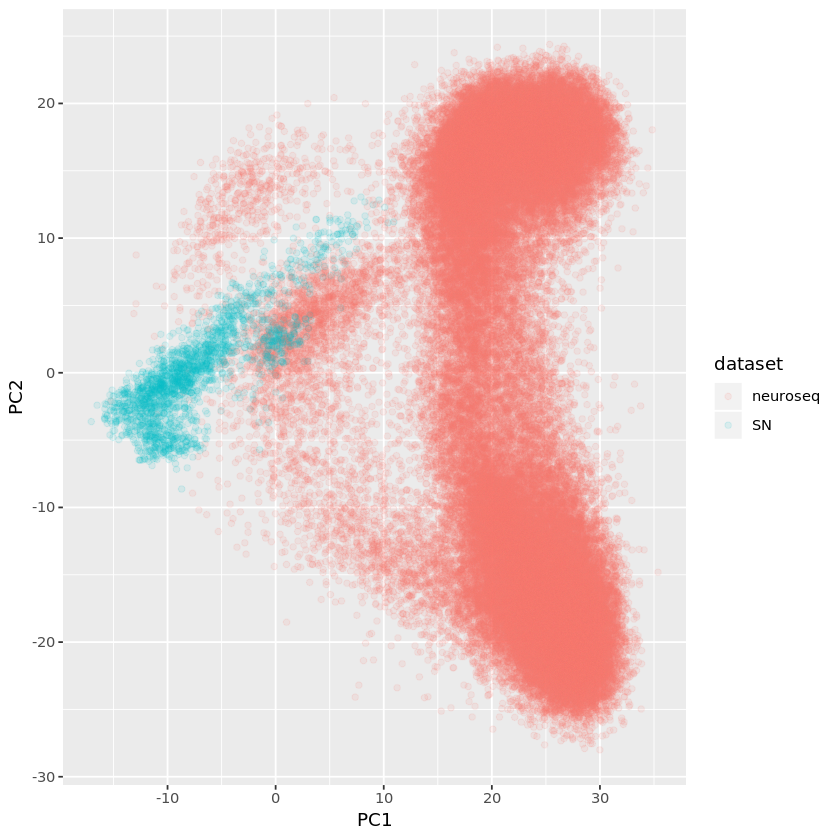

In [42]:
ggplot(df_pca, aes(x = PC1, y = PC2, colour = dataset)) + geom_point(alpha = 0.1)

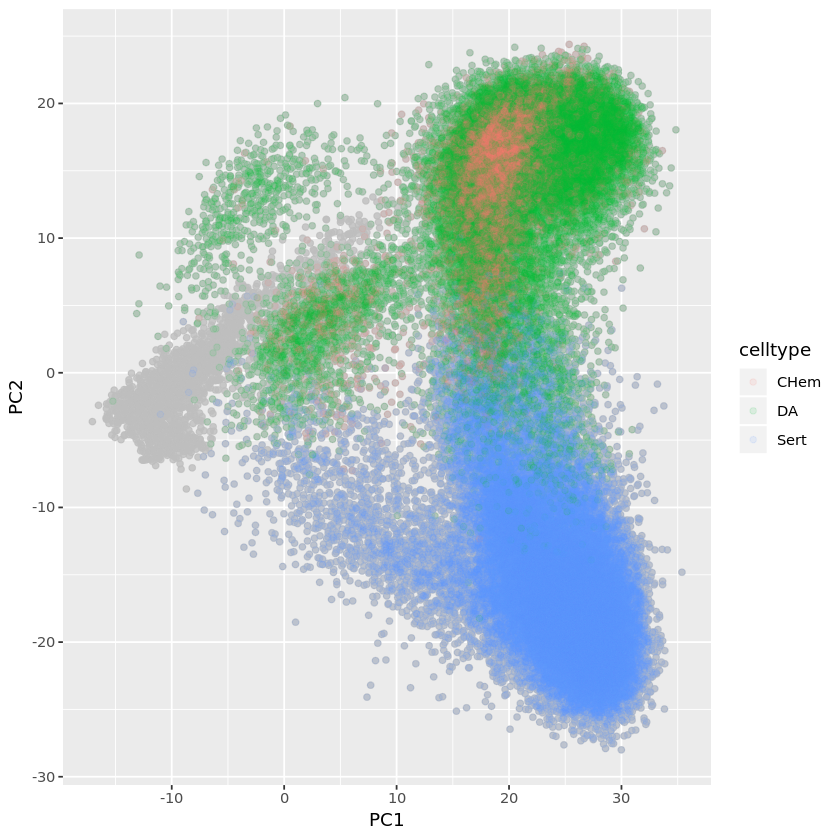

In [43]:
ggplot(df_pca, aes(x = PC1, y = PC2)) + geom_point(alpha = 0.8, col = "grey") +
    geom_point(aes(x = PC1, y = PC2, colour = celltype), data = df_pca[df_pca$dataset == "neuroseq",], alpha = 0.1) 

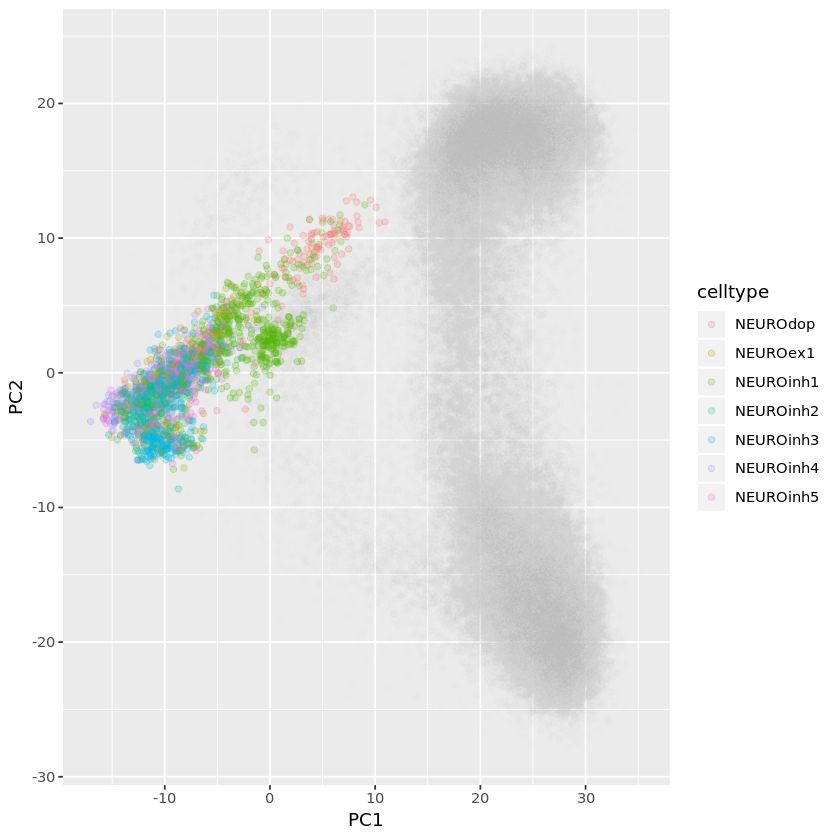

In [44]:
ggplot(df_pca, aes(x = PC1, y = PC2)) + geom_point(alpha = 0.01, col = "grey") +
    geom_point(aes(x = PC1, y = PC2, colour = celltype), data = df_pca[df_pca$dataset == "SN",], alpha = 0.2) 

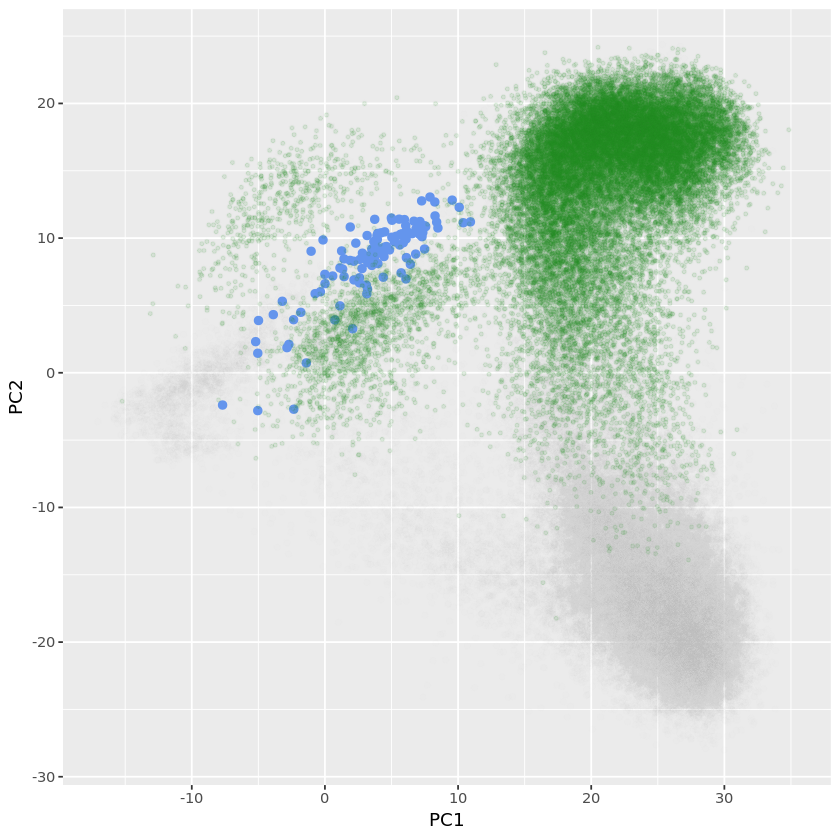

In [45]:
ggplot(df_pca, aes(x = PC1, y = PC2)) + geom_point(alpha = 0.01, col = "grey") +
    geom_point(aes(x = PC1, y = PC2), data = df_pca[df_pca$celltype == "NEUROdop",], col = "cornflowerblue", size=2) +
    geom_point(aes(x = PC1, y = PC2), data = df_pca[df_pca$celltype == "DA",], col = "forestgreen", alpha = 0.1, size = 0.8)

In [46]:
# ggplot(df_pca, aes(x = PC1, y = PC2)) + geom_point(alpha = 0.01) +
#     geom_point(aes(x = PC1, y = PC2), data = df_pca[grep("ASTRO",df_pca$celltype),], col = "pink", size=2) +
#     geom_point(aes(x = PC1, y = PC2), data = df_pca[df_pca$celltype == "Astro",], col = "purple", alpha = 0.1, size = 0.8)

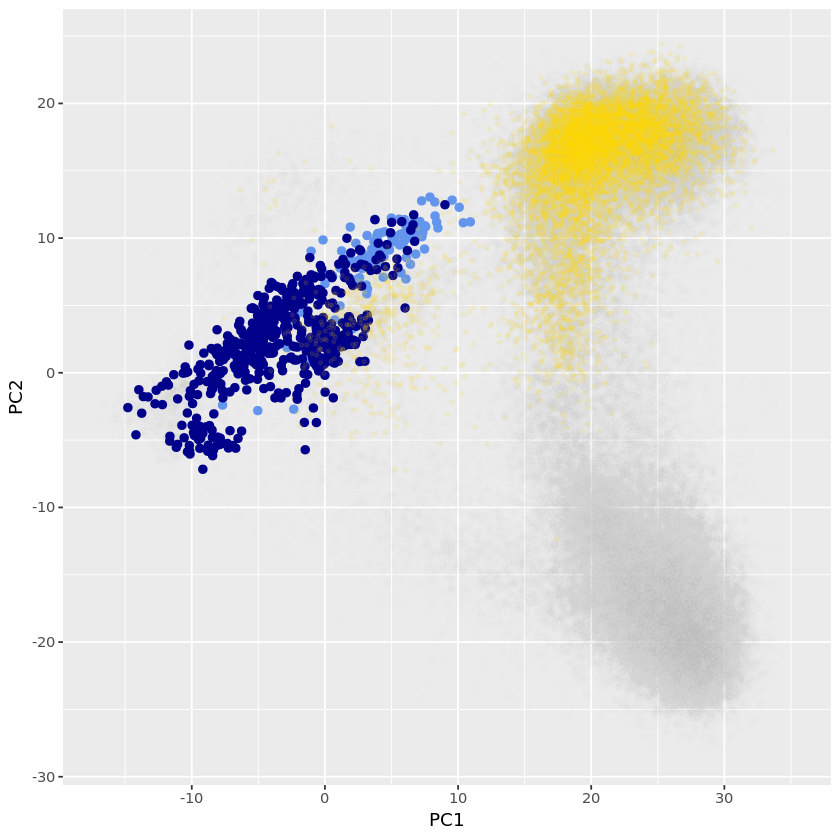

In [47]:
ggplot(df_pca, aes(x = PC1, y = PC2)) + geom_point(alpha = 0.01, col = "grey") +
    geom_point(aes(x = PC1, y = PC2), data = df_pca[df_pca$celltype == "NEUROdop",], col = "cornflowerblue", size=2) +
    geom_point(aes(x = PC1, y = PC2), data = df_pca[df_pca$celltype == "NEUROinh1",], col = "darkblue", size=2) +
    geom_point(aes(x = PC1, y = PC2), data = df_pca[df_pca$celltype == "CHem",], col = "gold", alpha = 0.1, size = 0.8)

In [63]:
# sel_cells = colnames(neuroseq[,neuroseq$celltype == 'DA'])
sel_cells = colnames(neuroseq[,neuroseq$time_point == 'D30' & neuroseq$celltype == 'DA'])
# sel_cells = colnames(neuroseq[,neuroseq$time_point == 'D52' & neuroseq$celltype == 'DA' & neuroseq$treatment == 'NONE'])
# sel_cells = colnames(neuroseq[,neuroseq$time_point == 'D52' & neuroseq$celltype == 'DA' & neuroseq$treatment == 'ROT'])
length(sel_cells)

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] 13799

In [64]:
closest_atlas_cell_ind = BiocNeighbors::queryKNN(
    joint_mnn_pca[colnames(SN),],
    joint_mnn_pca[sel_cells,],
  k = 1, get.index = TRUE, get.distance = FALSE)

In [65]:
mapped_cells = colnames(SN)[closest_atlas_cell_ind$index]

In [66]:
df = as.data.frame(colData(SN))

In [67]:
df_mapped = df[mapped_cells,]
# unique(df_mapped$clusters)
head(df_mapped)
nrow(df_mapped)
nrow(df_mapped[df_mapped$clusters == "NEUROdop",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$clusters == "NEUROinh1",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$clusters == "ENDOinh3",])/nrow(df_mapped)

,nUMI,nGene,dataset,clusters,tsne1,tsne2
Miami6063c_TGGACGCGTAAATGTG-1,7081,3095,Miami6063,NEUROdop,3.565996,5.645418
Miami6063c_TGGACGCGTAAATGTG-1.1,7081,3095,Miami6063,NEUROdop,3.565996,5.645418
Miami6063c_TGGACGCGTAAATGTG-1.2,7081,3095,Miami6063,NEUROdop,3.565996,5.645418
Miami6063c_TGGACGCGTAAATGTG-1.3,7081,3095,Miami6063,NEUROdop,3.565996,5.645418
Miami6063c_TGGACGCGTAAATGTG-1.4,7081,3095,Miami6063,NEUROdop,3.565996,5.645418
Miami6063c_TGGACGCGTAAATGTG-1.5,7081,3095,Miami6063,NEUROdop,3.565996,5.645418


[1] 13799

[1] 0.8218712

[1] 0.1572578

[1] 0

In [46]:
head(df,2)

,nUMI,nGene,dataset,clusters,tsne1,tsne2
Miami6060a_CAGTCCTAGCGCTTAT-1,15375,6547,Miami6060,NEUROinh4,2.546116,7.337386
Miami6060a_GCACTCTCATGTAAGA-1,9172,4303,Miami6060,NEUROinh2,1.151210,12.393907


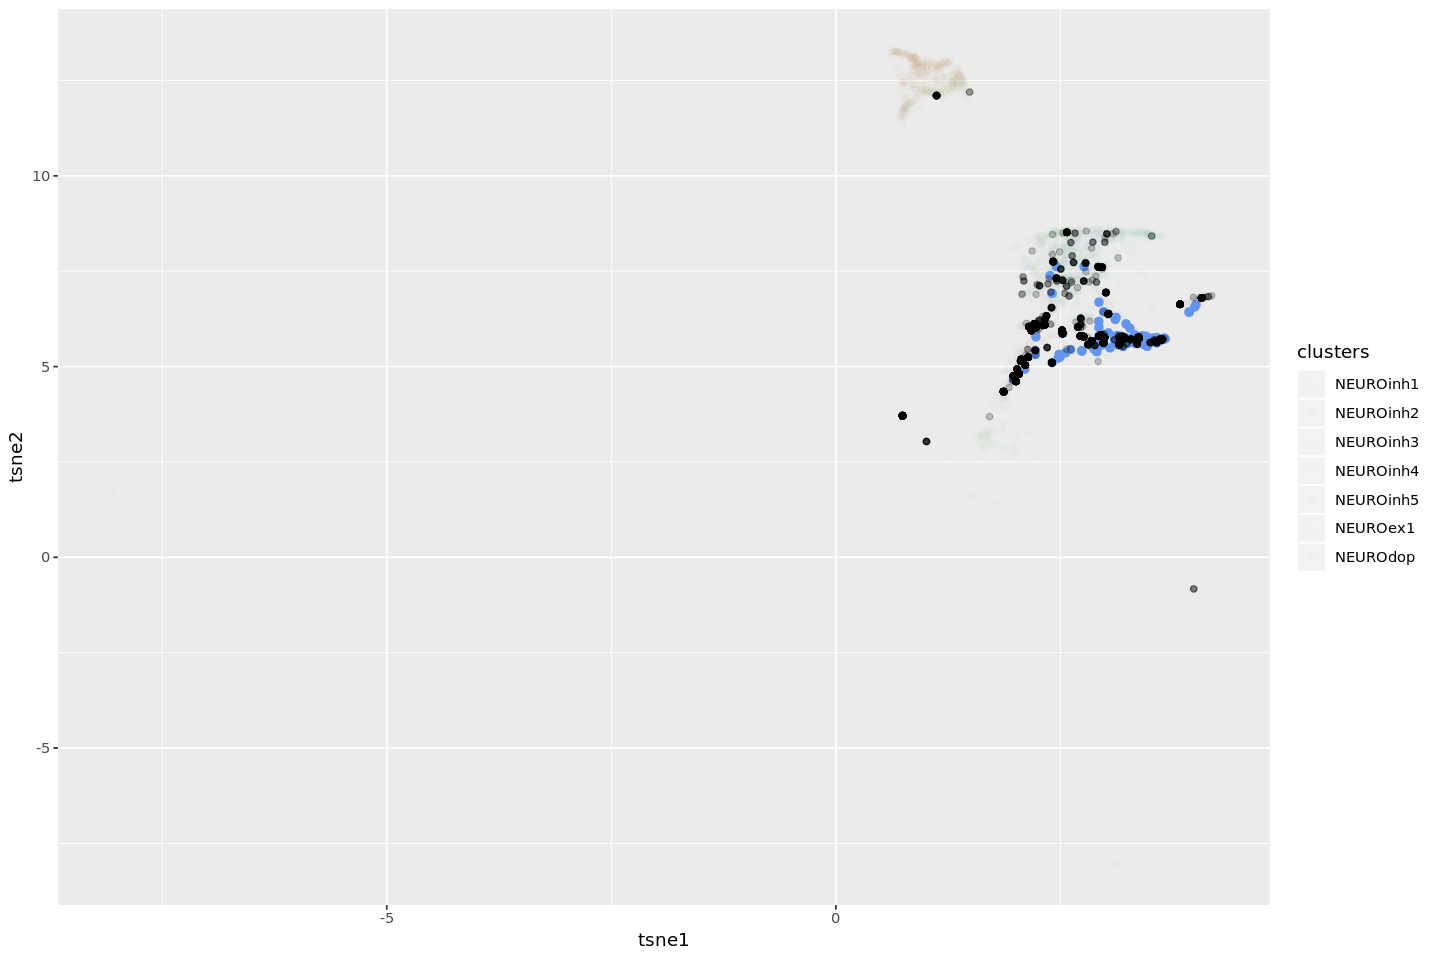

In [47]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(df, aes(x = tsne1, y = tsne2, colour = clusters)) + geom_point(alpha = 0.01) +
    geom_point(aes(x = tsne1, y = tsne2), data = df[df$clusters == "NEUROdop",], col = "cornflowerblue", size=2) +
#     geom_point(aes(x = tsne1, y = tsne2), data = df[df$clusters == "OLIGO5",], col = "coral", alpha = 0.1) +
    geom_point(aes(x = tsne1, y = tsne2), data = df[mapped_cells,], col = "black", alpha = 0.2)

In [48]:
sn_clusters = as.character(unique(SN$clusters))
sn_clusters

[1] "NEUROinh4" "NEUROinh2" "NEUROinh3" "NEUROdop"  "NEUROinh5" "NEUROinh1"
[7] "NEUROex1"

In [49]:
# length(mapped_cells)
for (cluster in sn_clusters){
    n = length(mapped_cells[mapped_cells %in% rownames(df[df$clusters == cluster,])])
    if (n/length(mapped_cells) > 0.05){
        print(c(cluster, n, n/length(mapped_cells)))
    }
}

[1] "NEUROdop"          "18479"             "0.501574290212258"
[1] "NEUROinh1"         "17912"             "0.486184246240704"


In [50]:
mat = matrix(0, nrow = length(unique(query$celltype)), ncol = length(unique(reference$clusters)))
nrow(mat)
ncol(mat)

[1] 3

[1] 7

In [51]:
rownames(mat) = unique(query$celltype)
colnames(mat) = unique(reference$clusters)
# mat

In [54]:
i = 0
for (celltype in unique(query$celltype)){
#     print(celltype)
    j = 0
    i = i+1
    sel_cells = colnames(query[,query$celltype == celltype])
    closest_atlas_cell_ind = BiocNeighbors::queryKNN(
        joint_mnn_pca[colnames(reference),],
        joint_mnn_pca[sel_cells,],
        k = 2, get.index = TRUE, get.distance = FALSE)
    mapped_cells = colnames(reference)[closest_atlas_cell_ind$index]
    for (cluster in unique(reference$clusters)){
#         print(cluster)
        j = j+1
        n = length(mapped_cells[mapped_cells %in% colnames(reference[,reference$clusters == cluster])])
        mat[i,j] = n/length(mapped_cells)
#         print(mat[i,j])
    }
}

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

In [55]:
mat

,NEUROinh4,NEUROinh2,NEUROinh3,NEUROdop,NEUROinh5,NEUROinh1,NEUROex1
Sert,0.003433581,1.058574e-03,0.0012214321,0.5095272,0.0169779057,0.4673878,3.935726e-04
DA,0.005301836,1.677796e-05,0.0069292977,0.8252911,0.0028186974,0.1588370,8.053421e-04
CHem,0.000615997,0.000000e+00,0.0008529189,0.8698351,0.0005686126,0.1280326,9.476876e-05


In [56]:
library(reshape2)
mat_melt = melt(mat)
head(mat_melt)

Var1,Var2,value
Sert,NEUROinh4,3.433581e-03
DA,NEUROinh4,5.301836e-03
CHem,NEUROinh4,6.159970e-04
Sert,NEUROinh2,1.058574e-03
DA,NEUROinh2,1.677796e-05
CHem,NEUROinh2,0.000000e+00


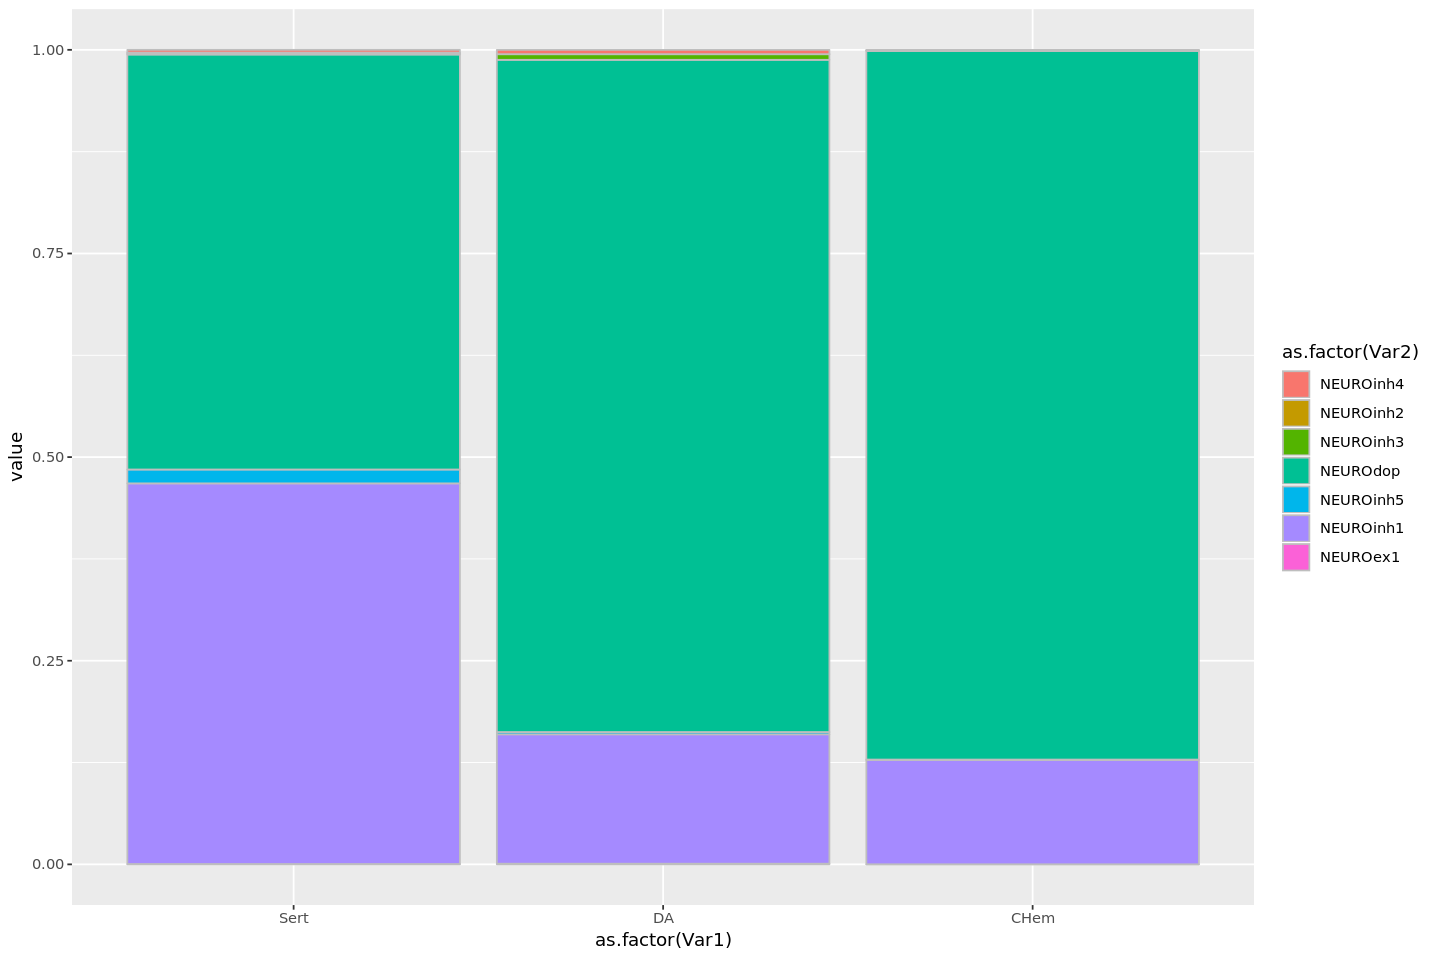

In [57]:
df = as.data.frame(mat_melt)
ggplot(df, aes(x = as.factor(Var1), y = value, fill = as.factor(Var2))) + geom_bar(stat="identity", col = "grey")

In [59]:
SN_filename = paste0(mydir,"snigra_sce.RDS")
SN = readRDS(SN_filename)
df = as.data.frame(colData(SN))

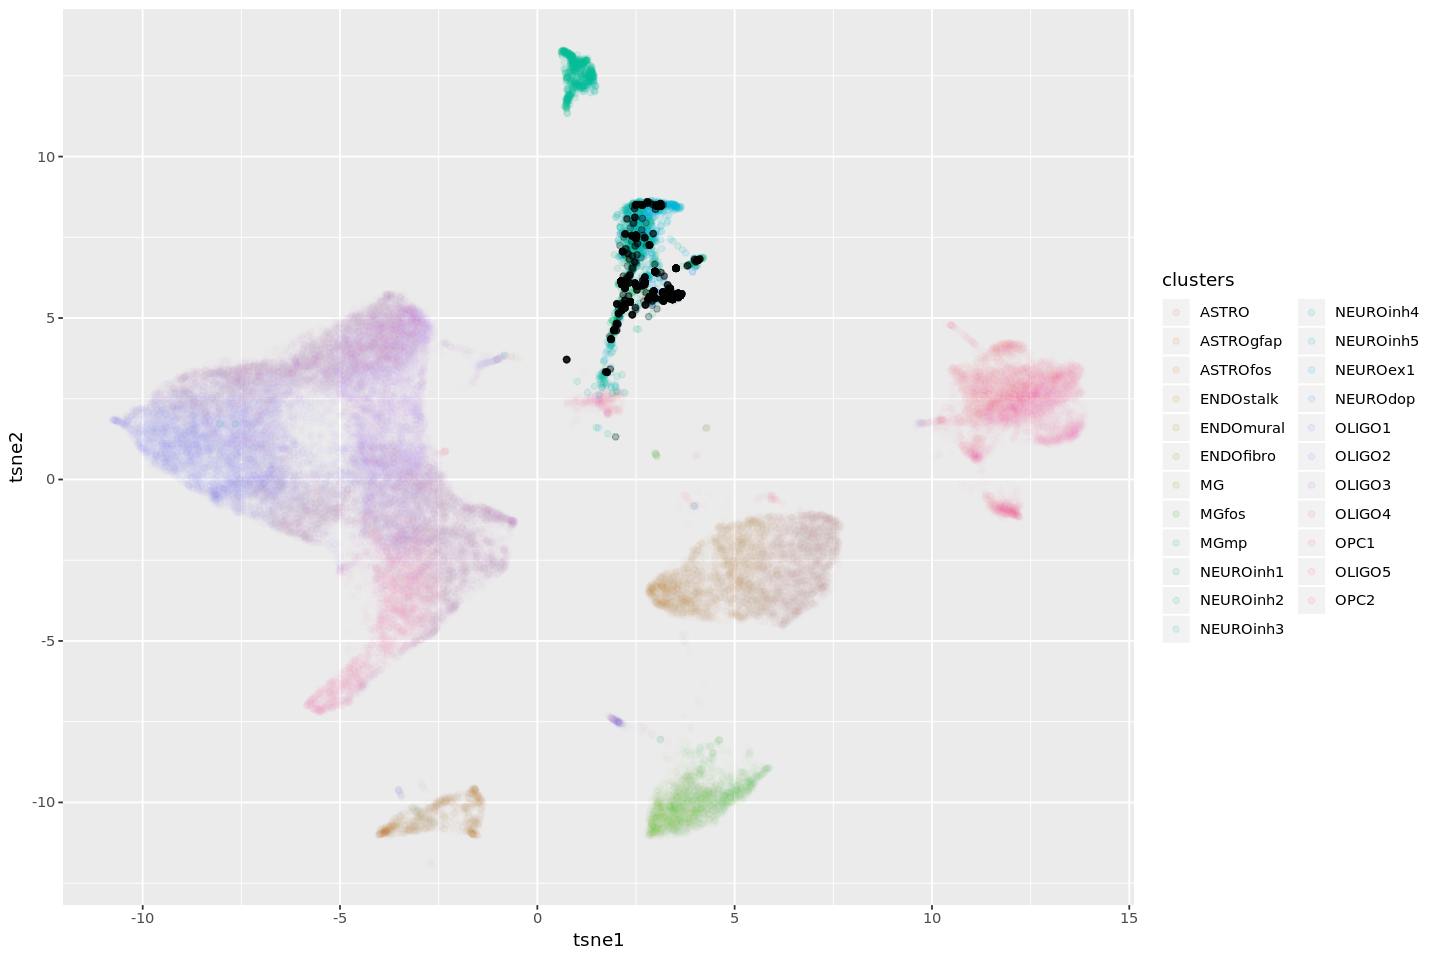

In [60]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(df, aes(x = tsne1, y = tsne2, colour = clusters)) + geom_point(alpha = 0.01) +
    geom_point(aes(x = tsne1, y = tsne2, colour = clusters), data = df[grep("NEURO",df$clusters),], alpha = 0.1) +
#     geom_point(aes(x = tsne1, y = tsne2), data = df[df$clusters == "NEUROdop",], col = "cornflowerblue", size=2) +
    geom_point(aes(x = tsne1, y = tsne2), data = df[mapped_cells,], col = "black", alpha = 0.2)